## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

In [3]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7127,Plot Area,Ready To Move,BTM 2nd Stage,5 Bedroom,NaN,2990,5.0,3.0,416.0
11265,Built-up Area,Ready To Move,Benson Town,3 BHK,NaN,1805,3.0,2.0,280.0
6633,Plot Area,Ready To Move,Hoskote,5 Bedroom,NaN,900,5.0,2.0,110.0
8906,Super built-up Area,Ready To Move,OMBR Layout,2 BHK,NaN,1101,2.0,2.0,66.0
7691,Built-up Area,Ready To Move,Kalyan nagar,2 BHK,NaN,1250,2.0,2.0,65.0


In [4]:
df.shape

(13320, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### Dropping categorical columns

In [6]:
df = df.drop(['area_type','location','availability','society'],axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13304 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


In [8]:
df['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

# Variation of Price and Correlation 

<Axes: xlabel='price', ylabel='Density'>

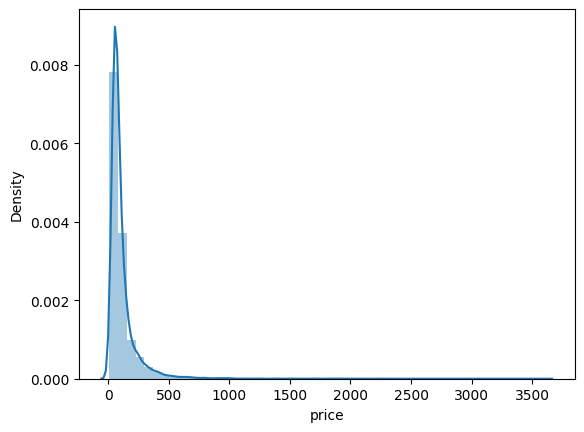

In [9]:
sns.distplot(df['price'])

<Axes: >

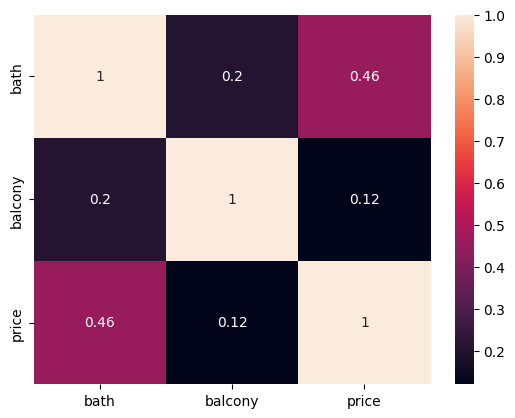

In [10]:
numericalColumns = ["bath","balcony","price"]
corr = df[numericalColumns].corr()
sns.heatmap(corr, annot=True)

Correlation of bath is more than balcony with price

# Data Cleaning

In [11]:
df.isnull().sum()

size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

### Cleaning 'size' column

In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df['size'].isnull().sum()

16

In [14]:
def changesize(val):
    if val == np.nan:
        return np.nan
    else:
        val = str(val).split(' ')
        val = val[0]
        return float(val)
    
df['size'] = df['size'].apply(changesize)

df['size'] = df['size'].fillna(df['size'].mean())


df['size'].isnull().sum()

0

In [15]:
df.isnull().sum()

size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

### Cleaning 'bath' column

In [16]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [17]:
# fill nan values with mean
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [18]:
df.isnull().sum()

size            0
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

### Cleaning 'balcony' column

In [19]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [20]:
# fill nan values with mean
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())

In [21]:
df.isnull().sum()

size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13320 non-null  float64
 1   total_sqft  13320 non-null  object 
 2   bath        13320 non-null  float64
 3   balcony     13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(4), object(1)
memory usage: 520.4+ KB


### Cleaning 'total_sqft' column

In [23]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
total_sqft_int = []

for val in df['total_sqft']:
    try:
        total_sqft_int.append(float(val))
    except:
        try:
            val = val.split('-')
            total_sqft_int.append((float(val[0]) + float(val[1])) / 2)  
        except:
            total_sqft_int.append(np.nan)  


In [25]:
# join new integer column
df = df.join(pd.DataFrame({'new_total_sqft':total_sqft_int}))

In [26]:
# fill na values in total_sqft_int with mean 
df['new_total_sqft'] = df['new_total_sqft'].fillna(df['new_total_sqft'].mean())

In [27]:
# dropping old total_sqft
df = df.drop(['total_sqft'],axis = 1)

In [28]:
df.sample(5)

,size,bath,balcony,price,new_total_sqft
10768,2.0,2.0,2.0,76.0,1700.0
13130,3.0,3.0,3.0,60.9,1450.0
5734,2.0,2.0,1.0,75.0,1235.0
11405,2.0,2.0,1.0,52.5,970.0
4799,3.0,4.0,1.0,390.0,9000.0


In [29]:
# ALl columns are Numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            13320 non-null  float64
 1   bath            13320 non-null  float64
 2   balcony         13320 non-null  float64
 3   price           13320 non-null  float64
 4   new_total_sqft  13320 non-null  float64
dtypes: float64(5)
memory usage: 520.4 KB


In [30]:
# No null values
df.isnull().sum()

size              0
bath              0
balcony           0
price             0
new_total_sqft    0
dtype: int64

# Model Implementation